In [1]:
%reset -f

In [2]:
user = "HHegde"
db = f"/Users/{user}/.data/oaklib/phenio.db"

In [3]:
%reload_ext sql
%sql sqlite:///{db}

In [4]:
%sql SELECT * FROM term_association LIMIT 2;

 * sqlite:////Users/HHegde/.data/oaklib/phenio.db
Done.


id,subject,predicate,object,evidence_type,publication,source
uuid:70269c5a-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0011097,ECO:0000269,PMID:31675180,infores:hpo-annotations
uuid:70269c5b-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0002187,ECO:0000269,PMID:31675180,infores:hpo-annotations


In [5]:
import sqlite3
import pandas as pd
from semsimian import Semsimian
from collections import Counter

In [6]:
conn = sqlite3.connect(db)
res = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
# tables = res.fetchall()

# tables

In [7]:
df_term_association = pd.read_sql_query("SELECT * FROM term_association", conn)
df_term_association.head()

,id,subject,predicate,object,evidence_type,publication,source
0,uuid:70269c5a-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0011097,ECO:0000269,PMID:31675180,infores:hpo-annotations
1,uuid:70269c5b-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0002187,ECO:0000269,PMID:31675180,infores:hpo-annotations
2,uuid:70269c5c-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0001518,ECO:0000269,PMID:31675180,infores:hpo-annotations
3,uuid:70269c5d-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0032792,ECO:0000269,PMID:31675180,infores:hpo-annotations
4,uuid:70269c5e-42a9-11ee-be37-31ef105c25ea,MONDO:0023659,biolink:has_phenotype,HP:0011451,ECO:0000269,PMID:31675180,infores:hpo-annotations


In [8]:
df_term_association['subject'].str.split(":").str[0].unique()

array(['MONDO', 'HGNC', 'WB', 'MGI', 'RGD', 'Xenbase', 'ZFIN'],
      dtype=object)

In [9]:
df_term_association['object'].str.split(":").str[0].unique()

array(['HP', 'WBPhenotype', 'MP', 'XPO', 'ZP'], dtype=object)

In [10]:
# MGI:1261425 => drosha, ribonuclease type III
df_100 = df_term_association[df_term_association['subject'].str.startswith("MGI:")].sample(n=100)
df_100 = df_100[['subject', 'predicate', 'object']]
df_100

,subject,predicate,object
527229,MGI:3033142,biolink:has_phenotype,MP:0010613
449005,MGI:1913346,biolink:has_phenotype,MP:0001697
273641,MGI:88190,biolink:has_phenotype,MP:0011085
273026,MGI:88180,biolink:has_phenotype,MP:0004623
328274,MGI:98493,biolink:has_phenotype,MP:0006340
...,...,...,...
535106,MGI:5004972,biolink:has_phenotype,MP:0002672
483354,MGI:1925976,biolink:has_phenotype,MP:0001923
499519,MGI:2159210,biolink:has_phenotype,MP:0000689
408718,MGI:1333777,biolink:has_phenotype,MP:0002378


In [11]:
df_100['object'].drop_duplicates()

527229    MP:0010613
449005    MP:0001697
273641    MP:0011085
273026    MP:0004623
328274    MP:0006340
             ...    
331345    MP:0002051
535106    MP:0002672
483354    MP:0001923
499519    MP:0000689
408718    MP:0002378
Name: object, Length: 94, dtype: object

In [12]:
%%time
predicates = ["rdfs:subClassOf", "BFO:0000050"]
semsimian = Semsimian(
            spo=None,
            predicates=predicates,
            pairwise_similarity_attributes=None,
            resource_path=db,
        )


CPU times: user 13.3 s, sys: 1.04 s, total: 14.3 s
Wall time: 14.5 s


In [13]:

subject_prefixes = ["MGI:"]
object_terms = set(df_100['object'].drop_duplicates())
assoc_predicate = {"biolink:has_phenotype"}
include_similarity_object = True
limit = None


In [19]:
%%time

search_type = "full"

full_result = semsimian.associations_search(
            assoc_predicate,
            object_terms,
            include_similarity_object,
            search_type,
            None,
            subject_prefixes,
            limit,
        )

CPU times: user 1h 23min 47s, sys: 58.5 s, total: 1h 24min 45s
Wall time: 1h 24min 31s


In [20]:
sorted(Counter(x[0] for x in full_result).items(), key=lambda x: x[0], reverse=True)

[(18.008877205969117, 6128),
 (17.008877205969117, 287),
 (16.42391470524796, 1326),
 (16.008877205969117, 893),
 (15.686949111081756, 134),
 (15.423914705247961, 48),
 (15.201522283911514, 379),
 (15.008877205969117, 84),
 (14.838952204526805, 73),
 (14.686949111081756, 189),
 (14.549445587331821, 40),
 (14.423914705247961, 67),
 (14.308437487828025, 448),
 (14.201522283911514, 77),
 (14.1019866103606, 276),
 (14.008877205969117, 85),
 (13.921414364718778, 41),
 (13.838952204526805, 9),
 (13.760949692525532, 330),
 (13.686949111081756, 27),
 (13.616559783190358, 23),
 (13.549445587331821, 8),
 (13.485315249912105, 225),
 (13.423914705247961, 84),
 (13.365021016194392, 3),
 (13.308437487828025, 2),
 (13.150896210841545, 74),
 (13.1019866103606, 87),
 (13.054680895582242, 1),
 (13.008877205969117, 57),
 (12.964483086610665, 3),
 (12.921414364718778, 70),
 (12.879594189024152, 7),
 (12.838952204526805, 73),
 (12.799423840340168, 40),
 (12.760949692525532, 60),
 (12.723474987106869, 26),


In [21]:
full_result[0][2]

'MGI:87966'

In [22]:
full_result[0][1]['object_best_matches']

{'MP:0000049': {'match_source': 'MP:0000049',
  'match_source_label': 'abnormal middle ear morphology (MPO)',
  'match_target': 'MP:0011947',
  'match_target_label': 'abnormal fluid intake (MPO)',
  'score': '4.277027869832077'},
 'MP:0000063': {'match_source': 'MP:0000063',
  'match_source_label': 'decreased bone mineral density (MPO)',
  'match_target': 'MP:0010868',
  'match_target_label': 'increased bone trabecula number (MPO)',
  'score': '10.714256457077491'},
 'MP:0000141': {'match_source': 'MP:0000141',
  'match_source_label': 'abnormal vertebral body morphology (MPO)',
  'match_target': 'MP:0010932',
  'match_target_label': 'increased trabecular bone connectivity density (MPO)',
  'score': '7.486295674714287'},
 'MP:0000180': {'match_source': 'MP:0000180',
  'match_source_label': 'abnormal circulating cholesterol level (MPO)',
  'match_target': 'MP:0000183',
  'match_target_label': 'decreased circulating LDL cholesterol level (MPO)',
  'score': '14.308437487828025'},
 'MP:0000

In [14]:
%%time
search_type = "flat"

flat_result = semsimian.associations_search(
            assoc_predicate,
            object_terms,
            include_similarity_object,
            search_type,
            None,
            subject_prefixes,
            limit,
        )

CPU times: user 36.5 s, sys: 1.27 s, total: 37.7 s
Wall time: 37 s


In [15]:
sorted(Counter(x[0] for x in flat_result).items(), key=lambda x: x[0], reverse=True)

[(0.3188831741366642, 1),
 (0.30584192439862545, 1),
 (0.305578684429642, 1),
 (0.30445969125214406, 1),
 (0.3029045643153527, 1),
 (0.30287648054145516, 1),
 (0.30219435736677114, 1),
 (0.3000678886625934, 1),
 (0.29459241323648105, 1),
 (0.28809106830122594, 1),
 (0.28780934922089824, 1),
 (0.2851985559566787, 1),
 (0.2850539291217257, 1),
 (0.284412032816773, 1),
 (0.28415300546448086, 1),
 (0.284012539184953, 1),
 (0.28222013170272814, 1),
 (0.2813765182186235, 1),
 (0.2808988764044944, 1),
 (0.280806572068708, 1),
 (0.27945205479452057, 1),
 (0.27883742052679383, 1),
 (0.27721866422689845, 1),
 (0.2766740250183959, 1),
 (0.276355421686747, 1),
 (0.27478532396565186, 1),
 (0.27440147329650094, 1),
 (0.2743221690590112, 1),
 (0.2742551566080978, 1),
 (0.27412814274128144, 1),
 (0.2739059967585089, 1),
 (0.27367636092468306, 1),
 (0.27348993288590606, 1),
 (0.2734567901234568, 1),
 (0.27320605661619485, 1),
 (0.27264325323475047, 1),
 (0.2722117202268431, 1),
 (0.27211394302848574, 1

In [16]:
%%time
search_type = "hybrid"

hybrid_result = semsimian.associations_search(
            assoc_predicate,
            object_terms,
            include_similarity_object,
            search_type,
            None,
            subject_prefixes,
            limit,
        )

CPU times: user 1h 24min 49s, sys: 1min 16s, total: 1h 26min 5s
Wall time: 1h 26min 20s


In [17]:
sorted(Counter(x[0] for x in hybrid_result).items(), key=lambda x: x[0], reverse=True)

[(18.008877205969117, 6128),
 (17.008877205969117, 287),
 (16.42391470524796, 1326),
 (16.008877205969117, 893),
 (15.686949111081756, 134),
 (15.423914705247961, 48),
 (15.201522283911514, 379),
 (15.008877205969117, 84),
 (14.838952204526805, 73),
 (14.686949111081756, 189),
 (14.549445587331821, 40),
 (14.423914705247961, 67),
 (14.308437487828025, 448),
 (14.201522283911514, 77),
 (14.1019866103606, 276),
 (14.008877205969117, 85),
 (13.921414364718778, 41),
 (13.838952204526805, 9),
 (13.760949692525532, 330),
 (13.686949111081756, 27),
 (13.616559783190358, 23),
 (13.549445587331821, 8),
 (13.485315249912105, 225),
 (13.423914705247961, 84),
 (13.365021016194392, 3),
 (13.308437487828025, 2),
 (13.150896210841545, 74),
 (13.1019866103606, 87),
 (13.054680895582242, 1),
 (13.008877205969117, 57),
 (12.964483086610665, 3),
 (12.921414364718778, 70),
 (12.879594189024152, 7),
 (12.838952204526805, 73),
 (12.799423840340168, 40),
 (12.760949692525532, 60),
 (12.723474987106869, 26),


In [18]:
len(hybrid_result)

15636

In [23]:
full_result_score_curie = [(a,c) for (a, _, c) in full_result]
flat_result_score_curie = [(a,c) for (a, _, c) in flat_result]
hybrid_result_score_curie = [(a,c) for (a, _, c) in hybrid_result]

In [24]:
len(full_result_score_curie)

15636

In [25]:
len(flat_result_score_curie)

15636

In [26]:
def get_ordered_list(result_1, result_2):
    # Create a dictionary that maps MGI values to tuples in result_2
    result_2_dict = {mgi: tup for tup, mgi in result_2}

    # Create a new list of tuples from result_2 that match the MGI values in result_1
    result_2_pruned = [(result_2_dict[mgi], mgi) for _, mgi in result_1 if mgi in result_2_dict]
    return result_2_pruned

### Plot params

In [34]:
n = 50
full_result_score_curie_subset = full_result_score_curie[:n]
full_ordered_flat_subset = get_ordered_list(full_result_score_curie_subset, flat_result_score_curie)
full_ordered_hybrid_subset = get_ordered_list(full_result_score_curie_subset, hybrid_result_score_curie)

# print(full_result_score_curie_subset)
# print(full_ordered_flat_subset)
# print(full_ordered_hybrid_subset)

In [35]:
flat_result_score_curie_subset = flat_result_score_curie[:n]
flat_ordered_full_subset = get_ordered_list(flat_result_score_curie_subset, full_result_score_curie)
flat_ordered_hybrid_subset = get_ordered_list(flat_result_score_curie_subset, hybrid_result_score_curie)

# print(flat_result_score_curie_subset)
# print(flat_ordered_full_subset)
# print(flat_ordered_hybrid_subset)


In [36]:
hybrid_result_score_curie_subset = hybrid_result_score_curie[:n]
hybrid_ordered_full_subset = get_ordered_list(hybrid_result_score_curie_subset, full_result_score_curie)
hybrid_ordered_flat_subset = get_ordered_list(hybrid_result_score_curie_subset, flat_result_score_curie)

# print(hybrid_result_score_curie_subset)
# print(hybrid_ordered_full_subset)
# print(hybrid_ordered_flat_subset)


In [37]:
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text


def plot_graph(full_result, flat_result, hybrid_result, title):
    full_values, full_labels = zip(*full_result)
    flat_values, flat_labels = zip(*flat_result)
    hybrid_values, hybrid_labels = zip(*hybrid_result)

    # Create a figure and a set of subplots
    fig, ax = plt.subplots(figsize=(10, 6))

    # Add a title
    if title:
        ax.set_title(title)

    # # Convert labels to numerical values
    # unique_labels = list(set(full_labels + flat_labels + hybrid_labels))
    # label_to_num = {label: num for num, label in enumerate(unique_labels)}

    # full_labels = [label_to_num[label] for label in full_labels]
    # flat_labels = [label_to_num[label] for label in flat_labels]
    # hybrid_labels = [label_to_num[label] for label in hybrid_labels]

    # Plot 'full' with 'o' markers
    ax.scatter(full_labels, full_values, marker='o', color='r', label='full search')
    texts1 = [plt.text(full_labels[i], full_values[i], str(txt), rotation=90) for i, txt in enumerate(full_values)]
    
    # Plot 'flat' with 'x' markers
    ax.scatter(flat_labels, flat_values, marker='x', color='b', label='flat search')
    texts2 = [plt.text(flat_labels[i], flat_values[i], str(txt), rotation=90) for i, txt in enumerate(flat_values)]
    
    # Plot 'hybrid' with 'x' markers
    ax.scatter(hybrid_labels, hybrid_values, marker='*', color='g', label='hybrid search')
    texts3 = [plt.text(hybrid_labels[i], hybrid_values[i], str(txt), rotation=90) for i, txt in enumerate(hybrid_values)]
    
    
    # Add a legend
    ax.legend()
    
    # Rotate x-axis labels
    plt.xticks(rotation=90)
    
    # all_texts = texts1+texts2+texts3
    
    # # Adjust text to avoid overlaps
    # adjust_text(all_texts, autoalign='y', only_move={'points':'y', 'text':'y'})
    
    # Show the plot
    plt.show()

Ordered by Full search ranks


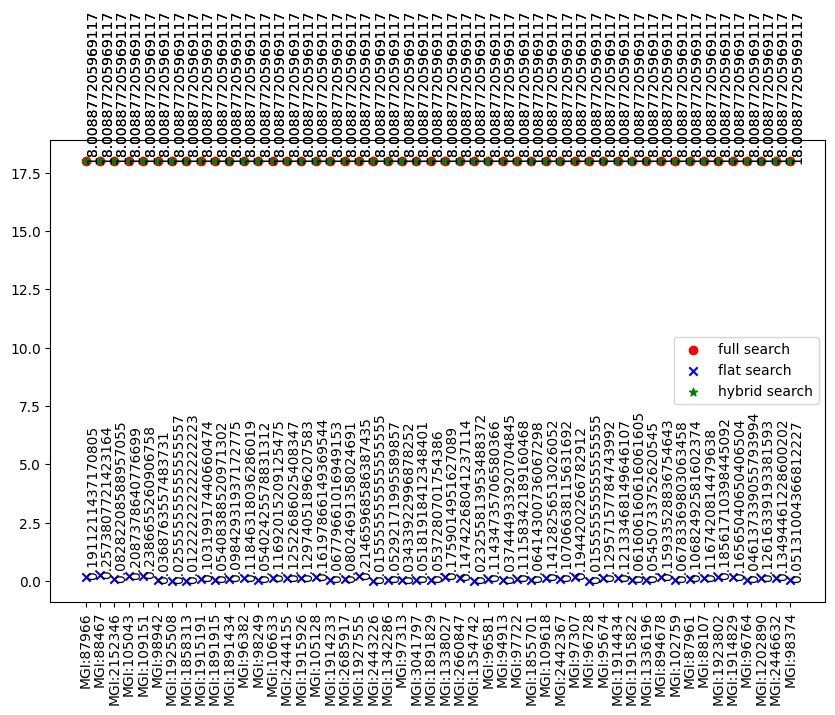

In [38]:
print("Ordered by Full search ranks")
plot_graph(full_result_score_curie_subset, full_ordered_flat_subset, full_ordered_hybrid_subset, None)

Ordered by Flat search ranks


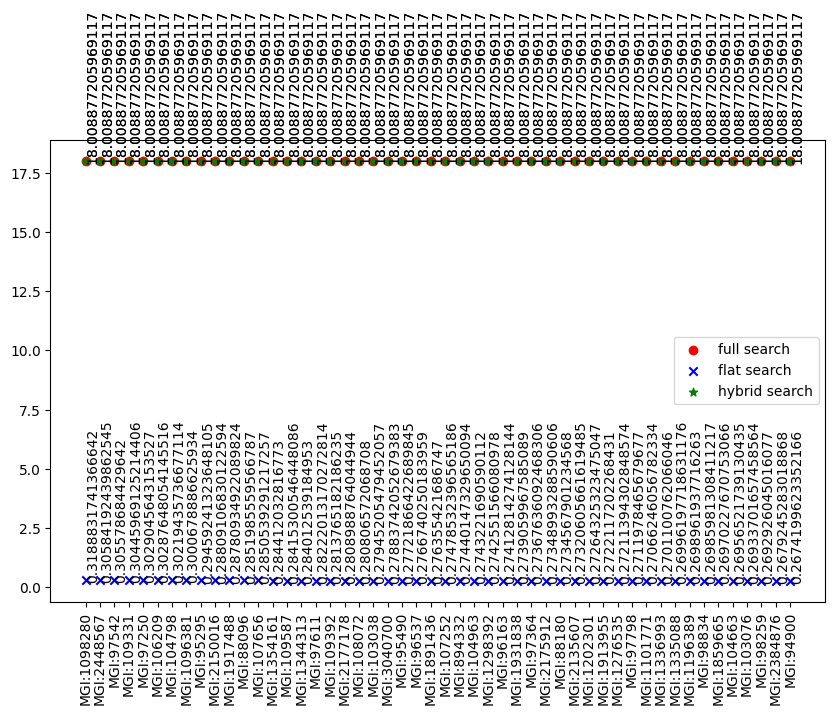

In [39]:
print( "Ordered by Flat search ranks")

plot_graph(flat_ordered_full_subset, flat_result_score_curie_subset, flat_ordered_hybrid_subset, None)

Ordered by Hybrid search ranks


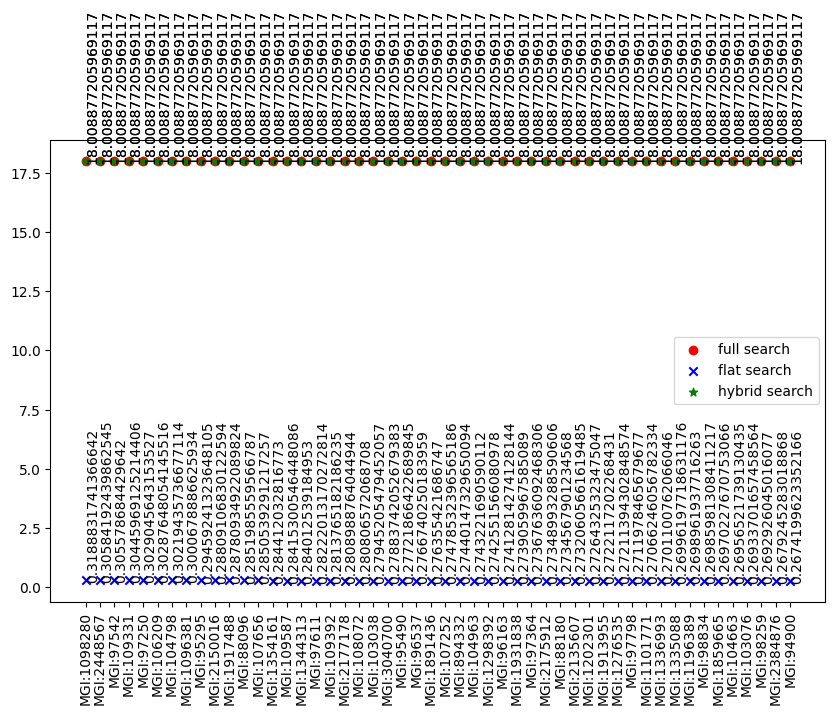

In [40]:

print("Ordered by Hybrid search ranks")
plot_graph(hybrid_ordered_full_subset, hybrid_ordered_flat_subset, hybrid_result_score_curie_subset, None)